In [31]:
import numpy as np
from create_training_data_lib import random_covariance_matrix
import matplotlib.pyplot as plt

npts = 1000

covs = []
cors = []
stds = []
for i in range(npts):
    cov, cor, std = random_covariance_matrix(n_dimensions=3, max_corr=0.8)
    covs.append(cov)
    cors.append(cor)
    stds.append(std)
covs = np.array(covs)
cors = np.array(cors)
stds = np.array(stds)
    

In [32]:
eigvals = []
dets = []
for i in range(npts):
    eigvals.append(np.linalg.eigvals(covs[i]))
    dets.append(np.linalg.det(covs[i]))
    
eigvals = np.array(eigvals)
dets = np.array(dets)


In [33]:
covs[np.argsort(dets)[-1]]


array([[ 2.0099136 , -0.82986475,  0.25678909],
       [-0.82986475,  2.20608674,  0.28054267],
       [ 0.25678909,  0.28054267,  1.95577093]])

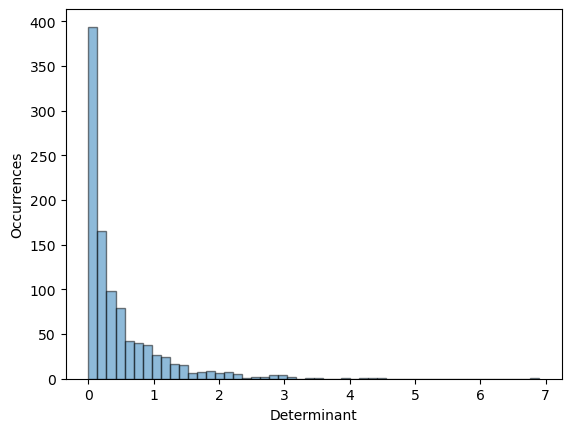

In [34]:
plt.hist(dets, 50, edgecolor='k', alpha=0.5);
plt.xlabel('Determinant')
plt.ylabel('Occurrences');


In [39]:
np.quantile(dets, 0.5)

0.21979636134620373

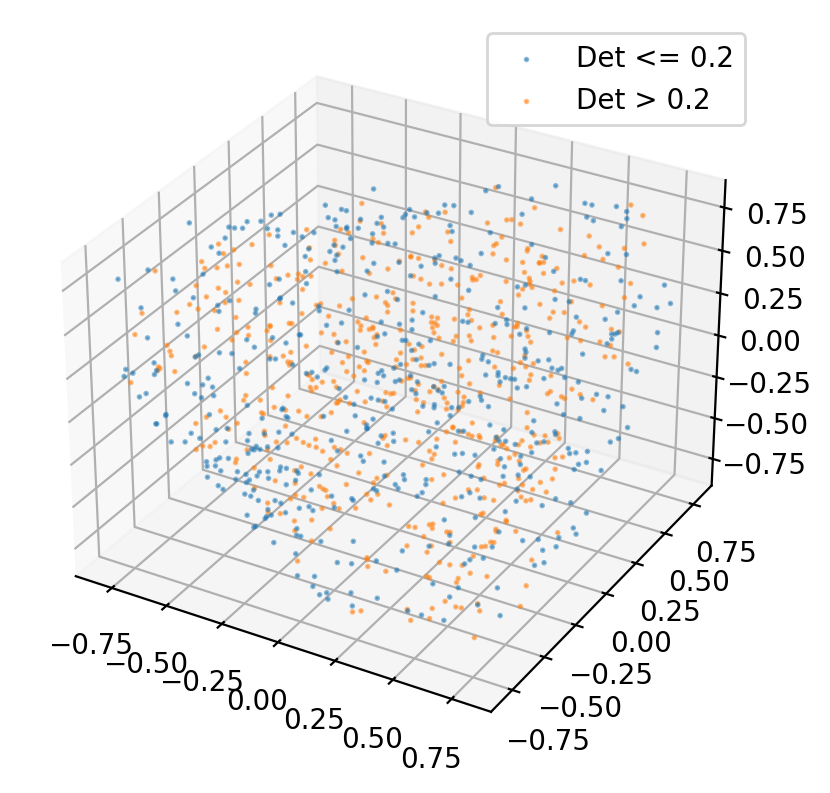

In [47]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    np.array([i[0,1] for i in cors[dets<=0.2]]),
    np.array([i[0,2] for i in cors[dets<=0.2]]),
    np.array([i[1,2] for i in cors[dets<=0.2]]),
    s=1, alpha=0.5, label='Det <= 0.2'
);

ax.scatter(
    np.array([i[0,1] for i in cors[dets>0.2]]),
    np.array([i[0,2] for i in cors[dets>0.2]]),
    np.array([i[1,2] for i in cors[dets>0.2]]),
    s=1, alpha=0.5, label='Det > 0.2'
);

plt.legend();



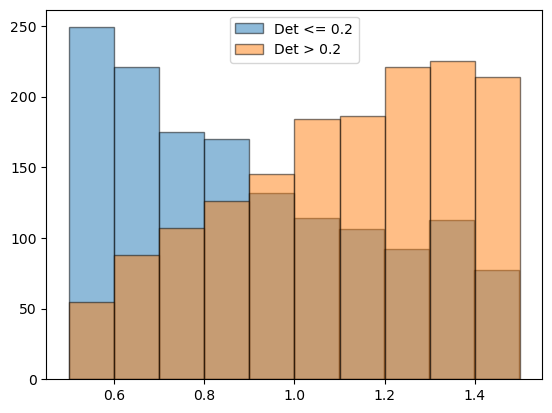

In [46]:
plt.hist(stds[dets<=0.2,:].flatten(), edgecolor='k', alpha=0.5, label='Det <= 0.2');
plt.hist(stds[dets>0.2,:].flatten(), edgecolor='k', alpha=0.5, label='Det > 0.2');
plt.legend();
         

In [52]:
np.linalg.eig(covs[0])[1]


array([[-0.50472678, -0.64532761,  0.5734136 ],
       [-0.54716061, -0.27463063, -0.79069165],
       [-0.66773209,  0.71283259,  0.21448441]])